In [1]:
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns

In [2]:
from pathlib import Path

commondir = './simresults/'
Path(commondir + "images").mkdir(parents=True, exist_ok=True)
originalWD = os.getcwd()
print("Reading data from", originalWD)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


In [3]:
def NormalizeUtility(val, numplayers):
    #return   val
    return   val/(1/(numplayers+1))

In [4]:
def LoadData(dirName, hlArray, npArray, bfArray, nlArray, ncArray):
    print("Reading data from", os.getcwd())
    #os.chdir(dirName)

    dir = dirName + '/results'
    
    if not os.path.exists(dir):
        os.mkdir(dir)
    
    frames=[]    
    for idx0, historyLen in enumerate(historyLenArray):
        for idx1, numclusters in enumerate(numclustersArray):
            for idx2, numplayers in enumerate(numplayersArray):
                for idx3, betaFactor in enumerate(betafactorArray):
                    for idx4, numLiars in enumerate(numLiarsArray):
                        if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                            continue

                        rounds = historyLen*roundsFactor
                        file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                        search_path = os.path.join(dir, file_name)
                        for fname in glob.glob(search_path):
                            # print("Reading file ", fname," using numplayers =", numplayers, 
                            #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                            tmpdf = pd.read_csv(fname)
                            frames.append(tmpdf)

    df = pd.concat(frames, ignore_index=True)
    return df

In [5]:
generateExcel = False

# Sim Beta

In [6]:
####################
# Sim Beta
####################
os.chdir(originalWD)
dir = commondir + 'sim-beta'

# History length
historyLenArray = [100]
roundsFactor=20
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]
                                    
df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,2000,1.05,100,0.97,...,0.015106,0.015995,0.030267,0.018947,NaN,NaN,0.015106,0.015995,0.030267,0.018947
1,64,8,8,1,2,1.0,2000,1.05,100,0.97,...,0.015260,0.017004,0.011345,0.000000,0.011345,0.000000,0.015260,0.017004,0.011345,0.000000
2,64,8,64,1,1,NaN,2000,1.05,100,0.97,...,0.015189,0.011895,0.030459,0.007368,NaN,NaN,0.015189,0.011895,0.030459,0.007368
3,64,8,8,1,2,1.0,2000,1.05,100,0.97,...,0.015295,0.012426,0.020334,0.005789,0.020334,0.005789,0.015295,0.012426,0.020334,0.005789
4,64,8,64,1,1,NaN,2000,1.05,100,0.97,...,0.015108,0.019383,0.027477,0.004211,NaN,NaN,0.015108,0.019383,0.027477,0.004211
5,64,8,8,1,2,1.0,2000,1.05,100,0.97,...,0.015198,0.020199,0.013885,0.000000,0.013885,0.000000,0.015198,0.020199,0.013885,0.000000
6,64,8,64,1,1,NaN,2000,1.05,100,0.97,...,0.015018,0.019156,0.030042,0.022632,NaN,NaN,0.015018,0.019156,0.030042,0.022632
7,64,8,8,1,2,1.0,2000,1.05,100,0.97,...,0.015254,0.019165,0.012013,0.003684,0.012013,0.003684,0.015254,0.019165,0.012013,0.003684
8,64,8,64,1,1,NaN,2000,1.05,100,0.97,...,0.015262,0.010315,0.023509,0.056316,NaN,NaN,0.015262,0.010315,0.023509,0.056316
9,64,8,8,1,2,1.0,2000,1.05,100,0.97,...,0.015366,0.011311,0.008463,0.051053,0.008413,0.051053,0.015366,0.011311,0.008463,0.051053


In [7]:
if generateExcel:
    writer = pd.ExcelWriter(commondir + 'SimBeta.xlsx', engine='xlsxwriter')
    df.to_excel(writer,index=False)
    writer.save()

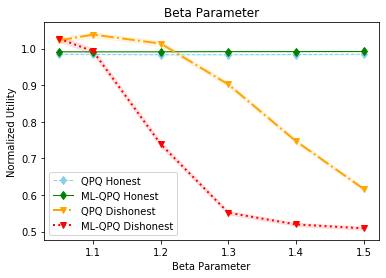

In [8]:
####################
# Sim Beta
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'betaFactor': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2 , numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))
                        
                    simresults['betaFactor'].append(betaFactor)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'betaFactor', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'betaFactor', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('betaFactor','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'betaFactor', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'betaFactor', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Beta Parameter")
plt.xlabel("Beta Parameter")
plt.ylabel("Normalized Utility");
plt.legend()
plt.savefig(commondir + 'images/betaparameter.pdf', format='pdf')

In [9]:
####################
# Sim Beta-90
####################
dir = commondir + 'sim-beta-0.90'

# History length
historyLenArray = [100]
roundsFactor=20
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014670,0.019267,0.096717,0.028421,NaN,NaN,0.014670,0.019267,0.096717,0.028421
1,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014916,0.020359,0.060911,0.018421,0.045982,0.017368,0.014916,0.020359,0.060911,0.018421
2,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014742,0.011961,0.084403,0.165263,NaN,NaN,0.014742,0.011961,0.084403,0.165263
3,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.015150,0.014237,0.041287,0.168947,0.040551,0.168947,0.015150,0.014237,0.041287,0.168947
4,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014589,0.013928,0.107544,0.148947,NaN,NaN,0.014589,0.013928,0.107544,0.148947
5,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014881,0.016519,0.066750,0.088947,0.053768,0.088947,0.014881,0.016519,0.066750,0.088947
6,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014552,0.017024,0.100359,0.187895,NaN,NaN,0.014552,0.017024,0.100359,0.187895
7,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014960,0.019163,0.049992,0.173158,0.049958,0.173158,0.014960,0.019163,0.049992,0.173158
8,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014445,0.012207,0.111997,0.083158,NaN,NaN,0.014445,0.012207,0.111997,0.083158
9,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014917,0.011973,0.065673,0.053158,0.064670,0.050000,0.014917,0.011973,0.065673,0.053158


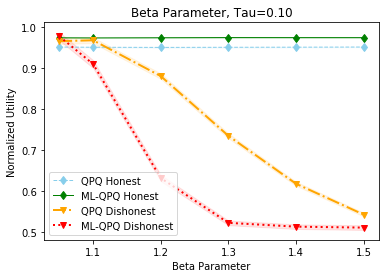

In [10]:
####################
# Sim Beta
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'betaFactor': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2 , numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))
                        
                    simresults['betaFactor'].append(betaFactor)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'betaFactor', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'betaFactor', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('betaFactor','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'betaFactor', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'betaFactor', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Beta Parameter, Tau={:.2f}".format(1-0.90))
plt.xlabel("Beta Parameter")
plt.ylabel("Normalized Utility");
#plt.legend()
plt.legend(loc='lower left')
#plt.savefig(commondir + 'images/betaparameter.eps', format='eps')
plt.savefig(commondir + 'images/betaparameter-0.90.pdf', format='pdf')

# Sim Clusters

In [11]:
####################
# Sim Cluster
####################
dir = commondir + 'sim-clusters'

# History length
historyLenArray = [100]
roundsFactor=20
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32]


df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,2,64,1,1,NaN,2000,1.2,100,0.97,...,0.015177,0.012129,0.030267,0.153158,NaN,NaN,0.015177,0.012129,0.030267,0.153158
1,64,2,32,1,2,1.0,2000,1.2,100,0.97,...,0.015338,0.010097,0.014603,0.199474,0.014603,0.199474,0.015338,0.010097,0.014603,0.199474
2,64,2,64,1,1,NaN,2000,1.2,100,0.97,...,0.015133,0.017168,0.029123,0.240000,NaN,NaN,0.015133,0.017168,0.029123,0.240000
3,64,2,32,1,2,1.0,2000,1.2,100,0.97,...,0.015298,0.013097,0.015046,0.457895,0.015046,0.457895,0.015298,0.013097,0.015046,0.457895
4,64,2,64,1,1,NaN,2000,1.2,100,0.97,...,0.015142,0.015221,0.030376,0.218947,NaN,NaN,0.015142,0.015221,0.030376,0.218947
5,64,2,32,1,2,1.0,2000,1.2,100,0.97,...,0.015272,0.015040,0.014612,0.318947,0.014612,0.318947,0.015272,0.015040,0.014612,0.318947
6,64,2,64,1,1,NaN,2000,1.2,100,0.97,...,0.015178,0.017918,0.025915,0.206316,NaN,NaN,0.015178,0.017918,0.025915,0.206316
7,64,2,32,1,2,1.0,2000,1.2,100,0.97,...,0.015246,0.018434,0.013225,0.200526,0.013225,0.200526,0.015246,0.018434,0.013225,0.200526
8,64,2,64,1,1,NaN,2000,1.2,100,0.97,...,0.015193,0.011193,0.031094,0.308947,NaN,NaN,0.015193,0.011193,0.031094,0.308947
9,64,2,32,1,2,1.0,2000,1.2,100,0.97,...,0.015408,0.008694,0.013509,0.445789,0.013509,0.445789,0.015408,0.008694,0.013509,0.445789


In [12]:
if generateExcel:
    writer = pd.ExcelWriter(commondir + 'SimCluster.xlsx', engine='xlsxwriter')
    df.to_excel(writer,index=False)
    writer.save()

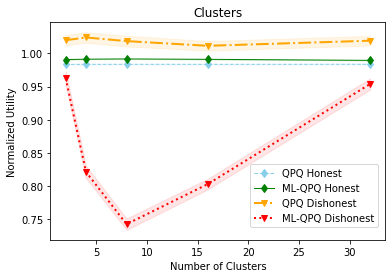

In [13]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('numclusters','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numclusters','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numclusters','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numclusters','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Normalized Utility");
plt.legend(bbox_to_anchor=(0.58, 0.37), loc='upper left')
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters.pdf', format='pdf')

In [14]:
####################
# Sim Cluster 2
####################
dir = commondir + 'sim-clusters-256players'

# History length
historyLenArray = [100]
roundsFactor=20
alpha = 1 


# Number of players
numplayersArray = [256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32, 64, 128]


df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,256,2,256,1,1,NaN,2000,1.2,100,0.97,...,0.003845,0.000521,0.029831,0.102105,NaN,NaN,0.003845,0.000521,0.029831,0.102105
1,256,2,128,1,2,1.0,2000,1.2,100,0.97,...,0.003858,0.000712,0.013672,0.157895,0.013672,0.157895,0.003858,0.000712,0.013672,0.157895
2,256,2,256,1,1,NaN,2000,1.2,100,0.97,...,0.003841,0.004033,0.027649,0.226842,NaN,NaN,0.003841,0.004033,0.027649,0.226842
3,256,2,128,1,2,1.0,2000,1.2,100,0.97,...,0.003866,0.002846,0.015531,0.398947,0.015531,0.398947,0.003866,0.002846,0.015531,0.398947
4,256,2,256,1,1,NaN,2000,1.2,100,0.97,...,0.003822,0.004754,0.029505,0.301053,NaN,NaN,0.003822,0.004754,0.029505,0.301053
5,256,2,128,1,2,1.0,2000,1.2,100,0.97,...,0.003873,0.004018,0.013212,0.405263,0.013212,0.405263,0.003873,0.004018,0.013212,0.405263
6,256,2,256,1,1,NaN,2000,1.2,100,0.97,...,0.003836,0.002161,0.031110,0.297895,NaN,NaN,0.003836,0.002161,0.031110,0.297895
7,256,2,128,1,2,1.0,2000,1.2,100,0.97,...,0.003872,0.001571,0.016475,0.430000,0.016475,0.430000,0.003872,0.001571,0.016475,0.430000
8,256,2,256,1,1,NaN,2000,1.2,100,0.97,...,0.003840,0.001040,0.033313,0.278947,NaN,NaN,0.003840,0.001040,0.033313,0.278947
9,256,2,128,1,2,1.0,2000,1.2,100,0.97,...,0.003853,0.001596,0.018533,0.430000,0.018533,0.430000,0.003853,0.001596,0.018533,0.430000


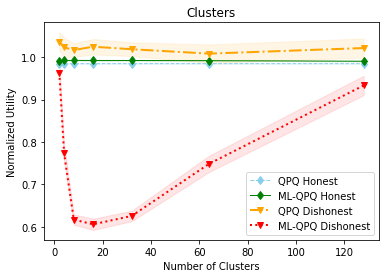

In [15]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }

confidence_level = 0.95
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('numclusters','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numclusters','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numclusters','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numclusters','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters256.pdf', format='pdf')

# Sim Dishonest

In [16]:
####################
# Sim Dishonest
####################
dir = commondir + 'sim-dishonest'

# History length
historyLenArray = [100]
roundsFactor=20
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Number of clusters
numclustersArray = [8]

df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,0,1,NaN,2000,1.2,100,0.97,...,0.015187,NaN,0.032031,NaN,NaN,NaN,0.015187,NaN,0.032031,NaN
1,64,8,8,0,2,1.0,2000,1.2,100,0.97,...,0.015282,NaN,0.014095,NaN,0.013980,NaN,0.015282,NaN,0.014095,NaN
2,64,8,64,0,1,NaN,2000,1.2,100,0.97,...,0.015167,NaN,0.026900,NaN,NaN,NaN,0.015167,NaN,0.026900,NaN
3,64,8,8,0,2,1.0,2000,1.2,100,0.97,...,0.015293,NaN,0.016694,NaN,0.016694,NaN,0.015293,NaN,0.016694,NaN
4,64,8,64,0,1,NaN,2000,1.2,100,0.97,...,0.015120,NaN,0.031735,NaN,NaN,NaN,0.015120,NaN,0.031735,NaN
5,64,8,8,0,2,1.0,2000,1.2,100,0.97,...,0.015302,NaN,0.015197,NaN,0.015197,NaN,0.015302,NaN,0.015197,NaN
6,64,8,64,0,1,NaN,2000,1.2,100,0.97,...,0.015095,NaN,0.035822,NaN,NaN,NaN,0.015095,NaN,0.035822,NaN
7,64,8,8,0,2,1.0,2000,1.2,100,0.97,...,0.015284,NaN,0.013446,NaN,0.013446,NaN,0.015284,NaN,0.013446,NaN
8,64,8,64,0,1,NaN,2000,1.2,100,0.97,...,0.015178,NaN,0.026423,NaN,NaN,NaN,0.015178,NaN,0.026423,NaN
9,64,8,8,0,2,1.0,2000,1.2,100,0.97,...,0.015299,NaN,0.017508,NaN,0.017508,NaN,0.015299,NaN,0.017508,NaN


In [17]:
if generateExcel:
    writer = pd.ExcelWriter(commondir + 'SimDishonest.xlsx', engine='xlsxwriter')
    df.to_excel(writer,index=False)
    writer.save() 

,UtilityHonests1,UtilityHonests2,QPQ/QPQ2_Honests,UtilityDishonests1,UtilityDishonests2,QPQ/QPQ2_Dishonests,confidence_intervalHonestsLow1,confidence_intervalHonestsLow2,confidence_intervalDishonestsLow1,confidence_intervalDishonestsLow2,confidence_intervalHonestsHigh1,confidence_intervalHonestsHigh2,confidence_intervalDishonestsHigh1,confidence_intervalDishonestsHigh2,numLiars
0,0.985236,0.992153,0.993028,NaN,NaN,NaN,0.985116,0.992030,NaN,NaN,0.985357,0.992277,NaN,NaN,0
1,0.983305,0.991308,0.991927,1.013923,0.745126,1.360741,0.983125,0.991112,1.005855,0.736594,0.983484,0.991504,1.021991,0.753657,1
2,0.981267,0.990479,0.990699,1.018792,0.747051,1.363751,0.981041,0.990236,1.013214,0.741075,0.981493,0.990723,1.024369,0.753027,2
3,0.979821,0.989886,0.989832,1.012294,0.738269,1.371172,0.979563,0.989589,1.007777,0.733399,0.980079,0.990184,1.016810,0.743139,3
4,0.977944,0.988950,0.988871,1.011777,0.742773,1.362162,0.977651,0.988615,1.007857,0.738498,0.978237,0.989286,1.015697,0.747048,4
5,0.976318,0.988457,0.987719,1.007921,0.738334,1.365129,0.975998,0.988076,1.004505,0.734534,0.976638,0.988838,1.011338,0.742134,5
6,0.973998,0.987369,0.986458,1.010214,0.741019,1.363277,0.973648,0.986944,1.007119,0.737482,0.974347,0.987793,1.013309,0.744556,6
7,0.972031,0.987439,0.984396,1.010427,0.735299,1.374171,0.971651,0.986977,1.007554,0.732090,0.972412,0.987901,1.013299,0.738508,7
8,0.970678,0.986330,0.984131,1.004859,0.737559,1.362412,0.970263,0.985832,1.002152,0.734541,0.971092,0.986828,1.007567,0.740577,8


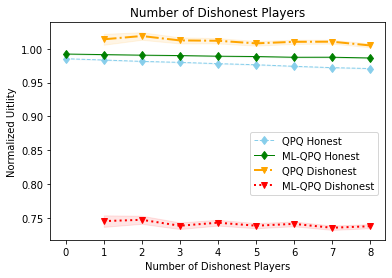

In [18]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numLiars': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                           
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsLow1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsLow2'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsHigh1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float('NaN'))

                    simresults['numLiars'].append(numLiars)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('numLiars','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numLiars','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numLiars', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numLiars', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numLiars','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numLiars','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Number of Dishonest Players")
plt.xlabel("Number of Dishonest Players")
plt.ylabel("Normalized Uitlity");
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(bbox_to_anchor=(0.58, 0.52), loc='upper left')
#plt.savefig(commondir + 'images/numliars.eps', format='eps')
plt.savefig(commondir + 'images/numliars.pdf', format='pdf')
rst

# Sim Players

In [19]:
####################
# Sim Players
####################
dir = commondir + 'sim-players'

# History length
historyLenArray = [100] 
roundsFactor=20
alpha = 1 

# Number of players
numplayersArray = [16, 32, 64, 128, 256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1]

# Number of clusters
numclustersArray = [8]


df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,16,8,16,0,1,NaN,2000,1.2,100,0.97,...,0.057997,NaN,0.027566,NaN,NaN,NaN,0.057997,NaN,0.027566,NaN
1,16,8,2,0,2,1.0,2000,1.2,100,0.97,...,0.057973,NaN,0.020724,NaN,0.020164,NaN,0.057973,NaN,0.020724,NaN
2,16,8,16,0,1,NaN,2000,1.2,100,0.97,...,0.057930,NaN,0.029638,NaN,NaN,NaN,0.057930,NaN,0.029638,NaN
3,16,8,2,0,2,1.0,2000,1.2,100,0.97,...,0.058284,NaN,0.017599,NaN,0.017138,NaN,0.058284,NaN,0.017599,NaN
4,16,8,16,0,1,NaN,2000,1.2,100,0.97,...,0.057938,NaN,0.039309,NaN,NaN,NaN,0.057938,NaN,0.039309,NaN
5,16,8,2,0,2,1.0,2000,1.2,100,0.97,...,0.058468,NaN,0.014868,NaN,0.014868,NaN,0.058468,NaN,0.014868,NaN
6,16,8,16,0,1,NaN,2000,1.2,100,0.97,...,0.058116,NaN,0.024901,NaN,NaN,NaN,0.058116,NaN,0.024901,NaN
7,16,8,2,0,2,1.0,2000,1.2,100,0.97,...,0.058598,NaN,0.009803,NaN,0.009803,NaN,0.058598,NaN,0.009803,NaN
8,16,8,16,0,1,NaN,2000,1.2,100,0.97,...,0.057957,NaN,0.034211,NaN,NaN,NaN,0.057957,NaN,0.034211,NaN
9,16,8,2,0,2,1.0,2000,1.2,100,0.97,...,0.058324,NaN,0.014638,NaN,0.014638,NaN,0.058324,NaN,0.014638,NaN


In [20]:
if generateExcel:
    writer = pd.ExcelWriter(commondir + 'SimPlayers.xlsx', engine='xlsxwriter')
    df.to_excel(writer,index=False)
    writer.save()

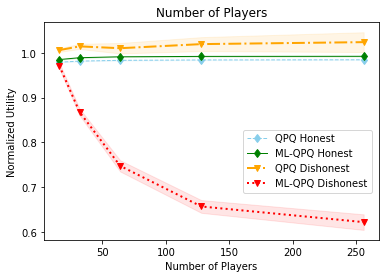

In [21]:
####################
# Sim Players
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numplayers': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([1]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    #print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                    #      " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    #if dfTmp1.UtilityHonest.empty:
                    #    print("\tDataFrame 1 is empty!")
                    #if dfTmp2.UtilityHonest.empty:
                    #    print("\tDataFrame 2 is empty!")
                        
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsLow1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsLow2'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsHigh1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float('NaN'))

                    simresults['numplayers'].append(numplayers)
                    
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('numplayers','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numplayers','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numplayers', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numplayers', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numplayers','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numplayers','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Number of Players")
plt.xlabel("Number of Players")
plt.ylabel("Normalized Utility");
plt.legend(bbox_to_anchor=(0.58, 0.53), loc='upper left')
#plt.savefig(commondir + 'images/numplayers.eps', format='eps')
plt.savefig(commondir + 'images/numplayers.pdf', format='pdf')

# Sim History Length

In [22]:
####################
# Sim History Len
####################
dir = commondir + 'sim-history'

# History length
historyLenArray = [100, 300, 1000]#, 3000]
roundsFactor=20
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]

df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,2000,1.2,100,0.97,...,0.015048,0.017238,0.028154,0.390000,NaN,NaN,0.015048,0.017238,0.028154,0.390000
1,64,8,8,1,2,1.0,2000,1.2,100,0.97,...,0.015253,0.009371,0.014779,0.966316,0.014386,0.966316,0.015253,0.009371,0.014779,0.966316
2,64,8,64,1,1,NaN,2000,1.2,100,0.97,...,0.014951,0.023734,0.028697,0.123158,NaN,NaN,0.014951,0.023734,0.028697,0.123158
3,64,8,8,1,2,1.0,2000,1.2,100,0.97,...,0.015200,0.015087,0.013492,0.521579,0.013492,0.521579,0.015200,0.015087,0.013492,0.521579
4,64,8,64,1,1,NaN,2000,1.2,100,0.97,...,0.015113,0.015175,0.030977,0.274211,NaN,NaN,0.015113,0.015175,0.030977,0.274211
5,64,8,8,1,2,1.0,2000,1.2,100,0.97,...,0.015269,0.010776,0.016817,0.553158,0.016475,0.553158,0.015269,0.010776,0.016817,0.553158
6,64,8,64,1,1,NaN,2000,1.2,100,0.97,...,0.015132,0.015577,0.031069,0.249474,NaN,NaN,0.015132,0.015577,0.031069,0.249474
7,64,8,8,1,2,1.0,2000,1.2,100,0.97,...,0.015310,0.012757,0.008688,0.594211,0.008688,0.594211,0.015310,0.012757,0.008688,0.594211
8,64,8,64,1,1,NaN,2000,1.2,100,0.97,...,0.015196,0.012357,0.029114,0.226316,NaN,NaN,0.015196,0.012357,0.029114,0.226316
9,64,8,8,1,2,1.0,2000,1.2,100,0.97,...,0.015339,0.009968,0.014252,0.438421,0.014252,0.438421,0.015339,0.009968,0.014252,0.438421


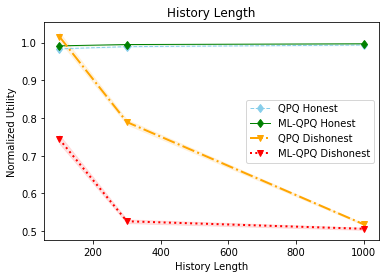

In [23]:
####################
# Sim History Len
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                       
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylen.eps', format='eps')
plt.savefig(commondir + 'images/historylen.pdf', format='pdf')

In [24]:
##########################
# Sim History Len Beta1.05-0.90
#########################
dir = commondir + 'sim-history-beta1.05-0.90'

# History length
historyLenArray = [100, 300, 1000] 
roundsFactor=20
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014589,0.017808,0.091445,0.085263,NaN,NaN,0.014589,0.017808,0.091445,0.085263
1,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.015246,0.001982,0.050944,0.088947,0.041947,0.000000,0.015246,0.001982,0.050944,0.088947
2,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014629,0.015306,0.098087,0.091579,NaN,NaN,0.014629,0.015306,0.098087,0.091579
3,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014921,0.018660,0.050835,0.000000,0.050835,0.000000,0.014921,0.018660,0.050835,0.000000
4,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014707,0.014540,0.095990,0.172105,NaN,NaN,0.014707,0.014540,0.095990,0.172105
5,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.014968,0.015164,0.055572,0.151053,0.052740,0.151053,0.014968,0.015164,0.055572,0.151053
6,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014524,0.015671,0.102289,0.080526,NaN,NaN,0.014524,0.015671,0.102289,0.080526
7,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.015014,0.016893,0.045865,0.110526,0.045614,0.110526,0.015014,0.016893,0.045865,0.110526
8,64,8,64,1,1,NaN,2000,1.05,100,0.9,...,0.014587,0.011460,0.102047,0.064211,NaN,NaN,0.014587,0.011460,0.102047,0.064211
9,64,8,8,1,2,1.0,2000,1.05,100,0.9,...,0.015105,0.015013,0.047260,0.018947,0.046683,0.018947,0.015105,0.015013,0.047260,0.018947


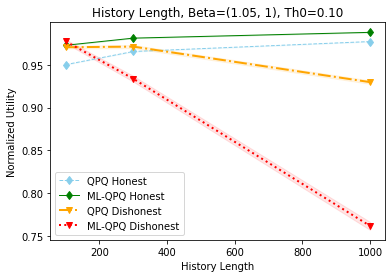

In [25]:
##########################
# Sim History Len Beta1.05-0.90
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0={:.2f}".format(1-0.90))
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylenbeta1.05.eps', format='eps')
plt.savefig(commondir + 'images/historylenbeta1.05.pdf', format='pdf')

In [26]:
##########################
# Sim History Len -0.90
#########################
dir = commondir + 'sim-history-0.90'

# History length
historyLenArray = [100, 300, 1000] # [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 
roundsFactor=20
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]

df = LoadData(dir, historyLenArray, numplayersArray,
              betafactorArray, numLiarsArray, numclustersArray)
df.head(20)

Reading data from C:\Users\AgustinSantos\Desktop\QPQ\QPQ2Simulations


,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,FNTotalHonest_LL,FNTotalDishonest_LL,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,2000,1.2,100,0.9,...,0.014492,0.014096,0.101378,0.524737,NaN,NaN,0.014492,0.014096,0.101378,0.524737
1,64,8,8,1,2,1.0,2000,1.2,100,0.9,...,0.014894,0.007311,0.061604,0.849474,0.061512,0.849474,0.014894,0.007311,0.061604,0.849474
2,64,8,64,1,1,NaN,2000,1.2,100,0.9,...,0.014519,0.015150,0.098755,0.314737,NaN,NaN,0.014519,0.015150,0.098755,0.314737
3,64,8,8,1,2,1.0,2000,1.2,100,0.9,...,0.014818,0.013823,0.058079,0.620000,0.056992,0.620000,0.014818,0.013823,0.058079,0.620000
4,64,8,64,1,1,NaN,2000,1.2,100,0.9,...,0.014744,0.008191,0.098939,0.417368,NaN,NaN,0.014744,0.008191,0.098939,0.417368
5,64,8,8,1,2,1.0,2000,1.2,100,0.9,...,0.015159,0.007533,0.039716,0.703158,0.039440,0.703158,0.015159,0.007533,0.039716,0.703158
6,64,8,64,1,1,NaN,2000,1.2,100,0.9,...,0.014592,0.017144,0.099415,0.317895,NaN,NaN,0.014592,0.017144,0.099415,0.317895
7,64,8,8,1,2,1.0,2000,1.2,100,0.9,...,0.014975,0.010606,0.053183,0.927368,0.053124,0.927368,0.014975,0.010606,0.053183,0.927368
8,64,8,64,1,1,NaN,2000,1.2,100,0.9,...,0.014567,0.016472,0.100927,0.290526,NaN,NaN,0.014567,0.016472,0.100927,0.290526
9,64,8,8,1,2,1.0,2000,1.2,100,0.9,...,0.015106,0.003614,0.076140,0.765789,0.056675,0.727895,0.015106,0.003614,0.076140,0.765789


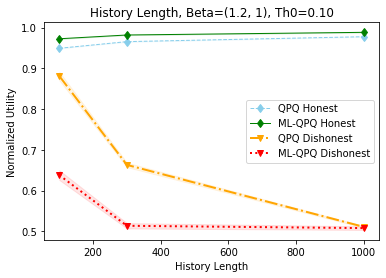

In [27]:
##########################
# Sim History Len th=0.90
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.2, 1), Th0={:.2f}".format(1-0.90))
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylenbeta1.05.eps', format='eps')
plt.savefig(commondir + 'images/historylen-0.90.pdf', format='pdf')